In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
data = pd.read_excel('/Users/mustafacitak/Desktop/Python/ML/Regression/LiR_PR_Dataset.xlsx')
print(data.head())

   year  sales_quantity
0  2014             100
1  2014             200
2  2014             150
3  2014             250
4  2014             180


In [14]:
# X ve y değişkenlerini belirleme
X = data[['year']]
y = data['sales_quantity']

# Polinom regresyon modeli oluşturma ve eğitme
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [15]:
# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [16]:
# Eğitim ve test veri setleri üzerinde tahmin yapma
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Eğitim ve test veri setleri için doğruluk oranı hesaplama
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)

print('Eğitim Seti Doğruluk Oranı:', accuracy_train)
print('Test Seti Doğruluk Oranı:', accuracy_test)

Eğitim Seti Doğruluk Oranı: 0.35192203581814563
Test Seti Doğruluk Oranı: 0.34006410079782157


In [17]:
# 2025 yılında yapılacak satış adedi tahmini yapma
year_2025 = np.array([[2025]])
year_2025_poly = poly.transform(year_2025)
sales_2025_prediction = model.predict(year_2025_poly)
print('2025 yılında yapılacak satış adedi tahmini:', sales_2025_prediction)

2025 yılında yapılacak satış adedi tahmini: [383.08132941]


/Users/mustafacitak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


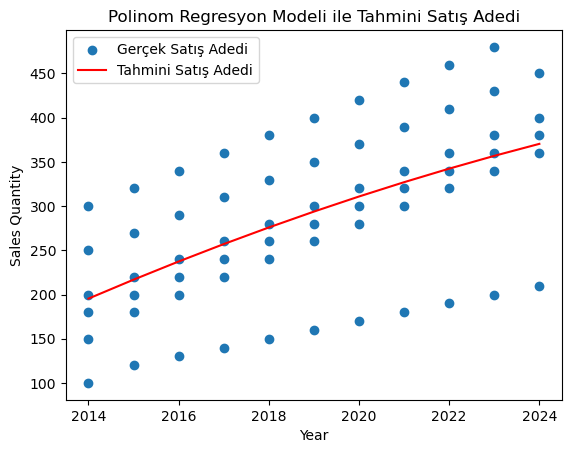

In [18]:
# 2025 yılında yapılacak satış adedi tahmini görselleştirme
plt.scatter(data['year'], data['sales_quantity'], label='Gerçek Satış Adedi')
plt.plot(data['year'], model.predict(X_poly), color='red', label='Tahmini Satış Adedi')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.title('Polinom Regresyon Modeli ile Tahmini Satış Adedi')
plt.legend()
plt.show()